# Ensemble Learning

Todos los modelos de aprendizaje estadístico y *machine learning* sufren el problema de equilibrio entre bias y varianza.

El término bias (sesgo) hace referencia a cuánto se alejan en promedio las predicciones de un modelo respecto a los valores reales. Refleja cómo es capaz el modelo de aprender la relación real que existe entre los predictores y la variable respuesta. Por ejemplo, si la relación sigue un patrón no lineal, por muchos datos de los que se disponga, un modelo de regresión lineal no podrá modelar correctamente la relación, por lo que tendrá un bias alto.

El término varianza hace referencia a cuánto cambia el modelo dependiendo de los datos utilizados en su entrenamiento. Idealmente, un modelo no debería modificarse demasiado por pequeñas variaciones en los datos de entrenamiento, si esto ocurre, es porque el modelo está memorizando los datos en lugar de aprender la verdadera relación entre los predictores y la variable respuesta. Por ejemplo, un modelo de árbol con muchos nodos, suele variar su estructura con que apenas cambien unos pocos datos de entrenamiento, tiene mucha varianza.

A medida que aumenta la complejidad de un modelo, este dispone de mayor flexibilidad para adaptarse a las observaciones, reduciendo así el bias y mejorando su capacidad predictiva. Sin embargo, alcanzado un determinado grado de flexibilidad, aparece el problema de **overfitting**, el modelo se ajusta tanto a los datos de entrenamiento que es incapaz de predecir correctamente nuevas observaciones. El mejor modelo es aquel que consigue un equilibro óptimo entre bias y varianza.

¿Cómo se controlan el bias y varianza en los modelos basados en árboles? Por lo general, los árboles pequeños (pocas ramificaciones) tienen poca varianza pero no consiguen representar bien la relación entre las variables, es decir, tienen bias alto. En contraposición, los árboles grandes se ajustan mucho a los datos de entrenamiento, por lo que tienen muy poco bias pero mucha varianza. Una forma de solucionar este problema son los métodos de ensemble.

Los métodos de ensemble combinan múltiples modelos en uno nuevo con el objetivo de lograr un equilibro entre bias y varianza, consiguiendo así mejores predicciones que cualquiera de los modelos individuales originales. A continuación veremos algunos de los ensemble más utilizados:

## Ensemble Learning (voting classifier)

El metodo **voting classifier**  es un tipo de aprendizaje conjunto en el que se entrenan varios modelos con el mismo conjunto de datos y sus predicciones se combinan mediante un voto mayoritario. El modelo con más votos se usa para hacer la predicción final. Tal clasificador puede ser útil para un conjunto de modelos igualmente buenos para equilibrar sus debilidades individuales.

El uso de un clasificador de votación puede ser beneficioso, ya que permite que varios modelos trabajen juntos, lo que podría mejorar la precisión general de la predicción. Sin embargo, es importante asegurarse de que los modelos utilizados en el conjunto sean lo suficientemente diversos como para que no todos cometan los mismos errores. De lo contrario, el clasificador de votos no mejorará la precisión de las predicciones.

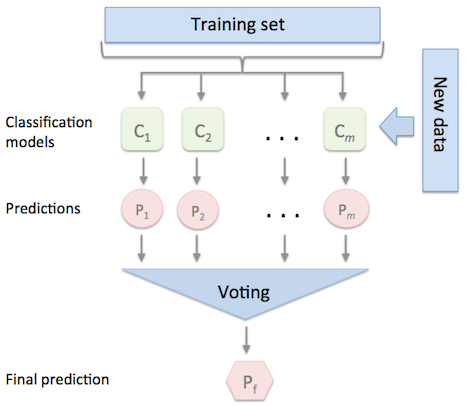

## Ensemble Learning: Bagging y Pasting

- Se agrupan varias instancias del **mismo algoritmo de predicción**

- Cada una de las instancias se entrena en **diferentes subconjuntos** del conjunto de datos de entrenamiento

- En ambos casos los ejemplos de entrenamiento pueden ser seleccionados varias veces para distintas instancias del algoritmo de predicción

- En la técnica de **Bagging** un mismo ejemplo de entrenamiento puede ser ser seleccionado varias vaces para la misma instancia del algoritmo de predicción

- El resultado de la **predicción** en tareas de **clasificación** es la clase más repetida entre las instancias, en tareas de **regresión** es la media de las predicciones

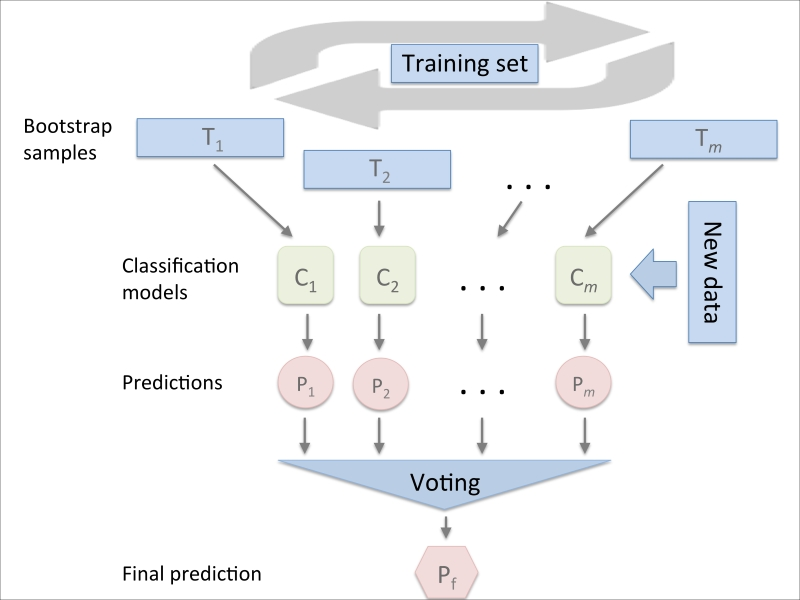

# Random Forest

- Se corresponde con un **Ensemble de Árboles de decisión**

- Se entrena utilizando la técnica de *Ensemble Learning* conocida como **Bagging**

- En lugar de buscar el mejor par (*característica, valor*) de entre todas las características del conjunto de datos, lo hace respecto a un **subconjunto aleatorio de características**

- Los hiperparámetros más relevantes se corresponde con:

    - **n-estimators**: Número de Árboles de decisión en el Ensemble
    - **max_depth**: Profundidad máxima de los Árboles de decisión que componen el *Ensemble*

- Permite **medir la importancia relativa de cada característica** del conjunto de datos en la realización de la predicción

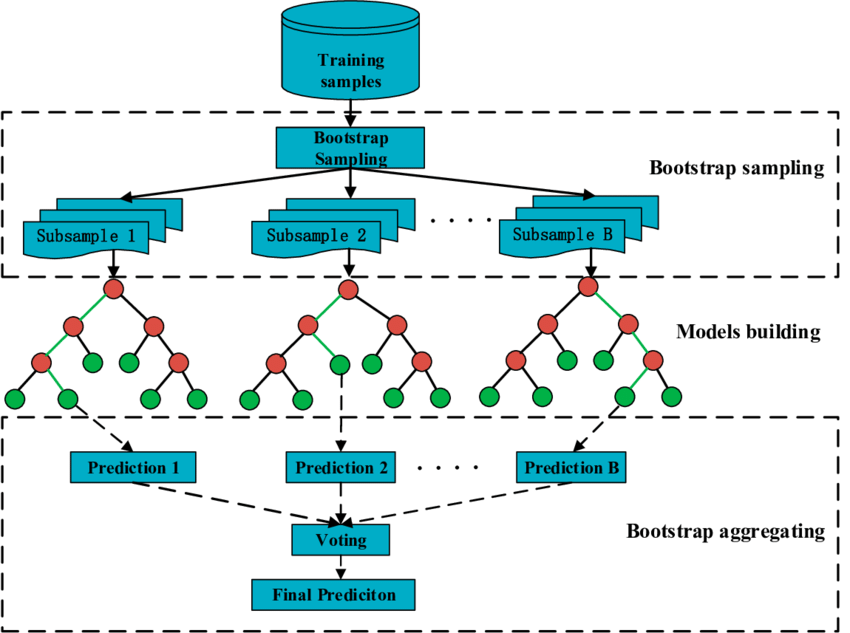

## Ensemble Learning: Boosting

Se ajustan secuencialmente múltiples modelos sencillos, llamados **weak learners**, de forma que cada modelo aprende de los errores del anterior. Como valor final, al igual que en bagging, se toma la media de todas las predicciones (variables continuas) o la clase más frecuente (variables cualitativas). Tres de los métodos de boosting más empleados son AdaBoost, Gradient Boosting y Stochastic Gradient Boosting.

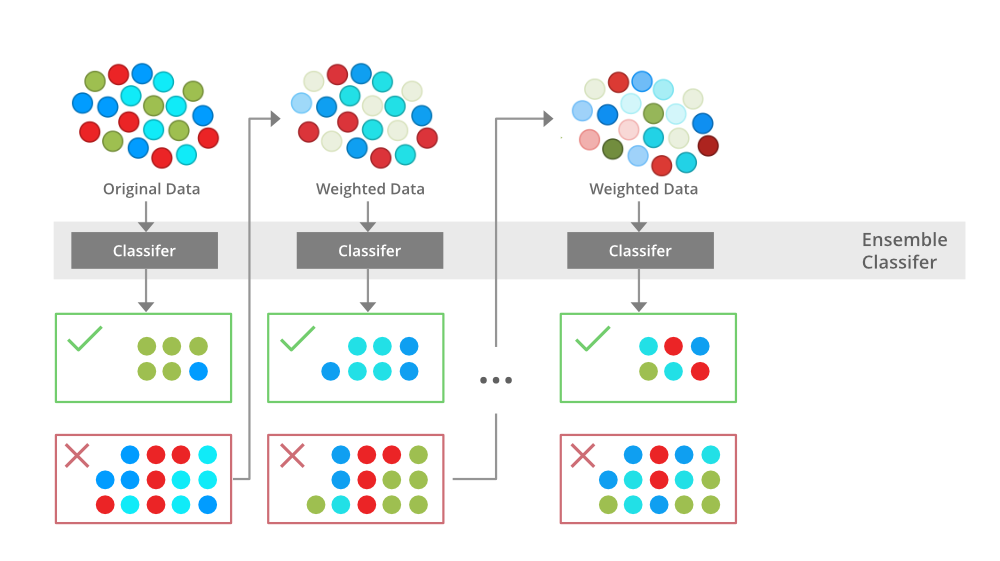

## Ensemble Learning: Stacking 

El objetivo del Stacking es explorar un espacio de diferentes modelos para el mismo problema. La idea es que puedes abordar un problema de aprendizaje con diferentes tipos de modelos que sean capaces de aprender una parte del problema, pero no todo el espacio del problema. Por lo tanto, puede crear diferentes modelos y usarlos para crear una predicción intermedia, una predicción para cada modelo aprendido. Luego agrega un nuevo modelo que aprende de las predicciones intermedias para el mismo objetivo.

Se dice que este modelo final está apilado encima de los demás, de ahí el nombre (Stacking). Por lo tanto, puede mejorar su rendimiento general y, a menudo, termina con un modelo que es mejor que cualquier modelo intermedio individual.

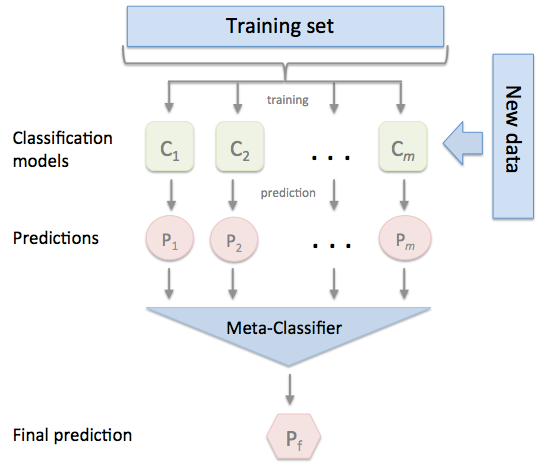

# Ejemplo de Regresión

El conjunto de datos contienen transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos.

Contiene solo variables de entrada numéricas que son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no podemos proporcionar las características originales ni más información general sobre los datos. Las características V1, V2, … V28 son los principales componentes obtenidos con PCA, las únicas características que no han sido transformadas con PCA son 'Tiempo' y 'Cantidad'. La característica 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. La función 'Cantidad' es la cantidad de la transacción, esta función se puede utilizar para el aprendizaje sensible a los costos dependiente del ejemplo. Feature 'Class' es la variable de respuesta y toma valor 1 en caso de fraude y 0 en caso contrario.


## Importar librerias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import copy

from matplotlib import pyplot
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
#Metricas
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Funciones auxiliares

In [2]:
# Construcción de un pipeline para los atributos numéricos
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('rbst_scaler', RobustScaler()),
    ])

In [3]:
# Transormador para codificar únicamente las columnas categoricas y devolver un df
class CustomOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self._oh = OneHotEncoder(sparse=False)
        self._columns = None
    def fit(self, X, y=None):
        X_cat = X.select_dtypes(include=['object'])
        self._columns = pd.get_dummies(X_cat).columns
        self._oh.fit(X_cat)
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_cat = X_copy.select_dtypes(include=['object'])
        X_num = X_copy.select_dtypes(exclude=['object'])
        X_cat_oh = self._oh.transform(X_cat)
        X_cat_oh = pd.DataFrame(X_cat_oh, 
                                columns=self._columns, 
                                index=X_copy.index)
        X_copy.drop(list(X_cat), axis=1, inplace=True)
        return X_copy.join(X_cat_oh)

In [4]:
# Transformador que prepara todo el conjunto de datos llamando pipelines y transformadores personalizados
class DataFramePreparer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self._full_pipeline = None
        self._columns = None
    def fit(self, X, y=None):
        num_attribs = list(X.select_dtypes(exclude=['object']))
        cat_attribs = list(X.select_dtypes(include=['object']))
        self._full_pipeline = ColumnTransformer([
                ("num", num_pipeline, num_attribs),
                ("cat", CustomOneHotEncoder(), cat_attribs),
        ])
        self._full_pipeline.fit(X)
        self._columns = pd.get_dummies(X).columns
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_prep = self._full_pipeline.transform(X_copy)
        return pd.DataFrame(X_prep, 
                            columns=self._columns, 
                            index=X_copy.index)

## Cargar datos

In [5]:
dataset = pd.read_excel('SCFP2009panel.xlsx')

## Preparamos la variable de predicción

In [6]:
# Promedio SP500 durante el 2007 y 2009
Average_SP500_2007=1478
Average_SP500_2009=948

# Tolerancia al riesgo en 2007
dataset['RiskFree07']= dataset['LIQ07'] + dataset['CDS07'] + dataset['SAVBND07'] + dataset['CASHLI07']
dataset['Risky07'] = dataset['NMMF07'] + dataset['STOCKS07'] + dataset['BOND07'] 
dataset['RT07'] = dataset['Risky07']/(dataset['Risky07']+dataset['RiskFree07'])

# Tolerancia al riesgo en 2009
dataset['RiskFree09']= dataset['LIQ09'] + dataset['CDS09'] + dataset['SAVBND09'] + dataset['CASHLI09']
dataset['Risky09'] = dataset['NMMF09'] + dataset['STOCKS09'] + dataset['BOND09'] 
dataset['RT09'] = dataset['Risky09']/(dataset['Risky09']+dataset['RiskFree09'])*\
                (Average_SP500_2009/Average_SP500_2007)

Calculemos el cambio porcentual en la tolerancia al riesgo entre 2007 y 2009.

In [7]:
dataset2 = copy.deepcopy(dataset)
dataset2['PercentageChange'] = np.abs(dataset2['RT09']/dataset2['RT07']-1)

Comprobando las filas con valores nulos o nan y eliminándolas.

In [8]:
dataset2=dataset2.dropna(axis=0)
dataset2=dataset2[~dataset2.isin([np.nan, np.inf, -np.inf]).any(1)]

En el siguiente paso, elegimos a los inversores inteligentes cuyo cambio en la tolerancia al riesgo entre 2007 y 2009 fue inferior al 10%. El propósito sería predecir la verdadera tolerancia al riesgo de un individuo dadas las características demográficas, financieras y de disposición a asumir riesgos.

In [9]:
dataset3 = copy.deepcopy(dataset2)  
dataset3 = dataset3[dataset3['PercentageChange']<=.1]
dataset3['TrueRiskTolerance'] = (dataset3['RT07'] + dataset3['RT09'])/2

Eliminemos otras etiquetas que podrían no ser necesarias para la predicción.

In [10]:
dataset3.drop(labels=['RT07', 'RT09'], axis=1, inplace=True)
dataset3.drop(labels=['PercentageChange'], axis=1, inplace=True)

## Selección de variables

### Eliminación de variables

Para filtrar aún más las variables, hacemos lo siguiente:

1. Consulte la descripción en el Diccionario de datos (https://www.federalreserve.gov/econres/files/codebk2009p.txt, https://www.federalreserve.gov/econresdata/scf/files/fedstables.macro.txt) y mantengamos sólo las variables que sean intuitivas

La descripción es la siguiente:


- **AGE:** Hay 6 categorías de edad, donde 1 representa menos de 35 años y 6 representa más de 75 años.
- **EDUC:** Hay 4 categorías educativas, donde 1 representa sin escuela secundaria y 4 representa título universitario.
- **MARRIED:** Representa el estado civil. Hay dos categorías donde 1 representa casado y 2 representa soltero.
- **OCCU:** Representa la categoría de ocupación. 1 representa categoría gerencial y 4 representa desempleado.
- **KIDS:** Representa el número de niños.
- **NWCAT:** Representa la categoría de patrimonio neto. Hay 5 categorías, donde 1 representa un patrimonio neto inferior al percentil 25 y 5 representa un patrimonio neto superior al percentil 90.
- **INCCL:** Representa la categoría de ingresos. Hay 5 categorías, donde 1 ingreso menor a 10,000 y 5 representa un patrimonio neto mayor a 100,000
- **RISK:** Representa la disposición a asumir riesgos en una escala de 1 a 4, donde 1 representa el nivel más alto de disposición a asumir riesgos.

2. Mantener sólo los factores intuitivos a partir de 2007 únicamente y eliminar todas las características intermedias y características relacionadas con 2009, ya que las variables de 2007 son las únicas necesarias para predecir la tolerancia al riesgo.

In [11]:
keep_list2 = ['AGE07','EDCL07','MARRIED07','KIDS07','OCCAT107','INCOME07','RISK07',
              'NETWORTH07','TrueRiskTolerance']

drop_list2 = [col for col in dataset3.columns if col not in keep_list2]

dataset3.drop(labels=drop_list2, axis=1, inplace=True)

In [12]:
dataset3.head()

,AGE07,EDCL07,MARRIED07,KIDS07,OCCAT107,INCOME07,RISK07,NETWORTH07,TrueRiskTolerance
60,77,2,1,0,3,3.141680e+04,4,2.152490e+05,0.199511
425,55,4,1,1,2,2.779588e+06,2,4.964759e+07,0.641458
1122,85,4,1,0,2,3.727417e+05,4,5.837768e+07,0.589943
1190,40,2,1,3,1,5.324882e+04,3,2.688929e+05,0.434127
1228,70,2,1,0,2,3.716767e+04,3,2.015066e+06,0.228218


## División de los datos

In [13]:
# dividir el conjunto de datos de validación para el final
Y= dataset3["TrueRiskTolerance"]
X = dataset3.loc[:, dataset3.columns != 'TrueRiskTolerance']
validation_size = 0.2
seed = 3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

## Modelo Random Forests para la regresión

In [14]:
model_RFR = RandomForestRegressor(max_depth=3, n_estimators=200)
model_RFR.fit(X_train, Y_train)

RandomForestRegressor(max_depth=3, n_estimators=200)

## Predicción

In [15]:
Y_pred = model_RFR.predict(X_test)

In [16]:
# Error de test del modelo 
# ==============================================================================
rmse_rfr = mean_squared_error(
            y_true  = Y_test,
            y_pred  = Y_pred,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_rfr}")


El error (rmse) de test es: 0.13796607157589286


# Importancia de las características

In [17]:
# Podemos extraer que características son más importantes para la correcta clasificación de los datos
feature_importances = {name: score for name, score in zip(list(dataset3), model_RFR.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head()

NETWORTH07    0.539669
AGE07         0.207583
INCOME07      0.154301
RISK07        0.056063
KIDS07        0.022066
dtype: float64

# Ejemplo de clasificación 

El conjunto de datos contienen transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos.

Contiene solo variables de entrada numéricas que son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no podemos proporcionar las características originales ni más información general sobre los datos. Las características V1, V2, … V28 son los principales componentes obtenidos con PCA, las únicas características que no han sido transformadas con PCA son 'Tiempo' y 'Cantidad'. La característica 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. La función 'Cantidad' es la cantidad de la transacción, esta función se puede utilizar para el aprendizaje sensible a los costos dependiente del ejemplo. Feature 'Class' es la variable de respuesta y toma valor 1 en caso de fraude y 0 en caso contrario.

In [18]:
dataset = pd.read_csv("creditcard.csv")

## División del conjunto de datos

In [19]:
Y= dataset["Class"]
X = dataset.loc[:, dataset.columns != 'Class']
validation_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=validation_size, 
                                                   stratify=dataset["Class"],
                                                   random_state=seed)

## Preparación del conjunto de datos¶

In [20]:
# Instanciamos nuestro transformador personalizado
data_preparer = DataFramePreparer()

In [21]:
# Hacemos el fit con el conjunto de datos general para que adquiera todos los valores posibles
data_preparer.fit(X)

DataFramePreparer()

## Escalado del conjunto de datos

In [22]:
# Transformamos el subconjunto de datos de entrenamiento
X_train_prep = data_preparer.transform(X_train)

In [23]:
# Transformamos el subconjunto de datos de validacion
X_test_prep = data_preparer.transform(X_test)

## Modelo Random Forests para la clasificación

In [24]:
model_RFC = RandomForestClassifier(max_depth=3, n_estimators=200)
model_RFC.fit(X_train_prep, Y_train)

RandomForestClassifier(max_depth=3, n_estimators=200)

In [25]:
# Accuracy de test del modelo 

Y_pred = model_RFC.predict(X=X_test_prep)
print(accuracy_score(Y_test, Y_pred))

0.9991573329588147


# Importancia de las características

In [26]:
# Podemos extraer que características son más importantes para la correcta clasificación de los datos
feature_importances = {name: score for name, score in zip(list(dataset), model_RFC.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head()

V17    0.196122
V12    0.172969
V14    0.126504
V10    0.114640
V11    0.110701
dtype: float64